In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train_df = pd.read_csv('../../../이적료_예측/FIFA_train.csv', encoding='utf-8')
train_df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [3]:
test_df = pd.read_csv('../../../이적료_예측/FIFA_test.csv', encoding='utf-8')
test_df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0
3824,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0
3825,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0
3826,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0


In [4]:
train_df = train_df.set_index(['id'])
test_df = test_df.set_index(['id'])

train_df = train_df.drop(['name'], axis=1)
test_df = test_df.drop(['name'], axis=1)

train_df

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
id,,,,,,,,,,
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
3,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
7,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
8,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
9,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...
16925,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
16936,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
16941,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0


### 추가 EDA

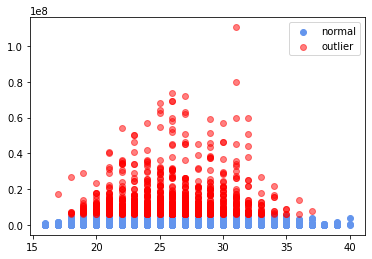

total normal :  7754
total outlier :  1178


In [5]:
Q1 = train_df['value'].describe()['25%'] # 계약금의 1분위수
Q3 = train_df['value'].describe()['75%'] # 계약금의 3분위수
IQR = Q3-Q1

# 정상 데이터
temp = train_df.loc[(train_df['value'] > (Q1 - 1.5*IQR)) & (train_df['value'] < (Q3 + 1.5*IQR)),:]

# 이상치 데이터
outlier_0 = train_df.loc[(train_df['value'] > (Q3 + 1.5*IQR)),:]

plt.scatter(temp['age'], temp['value'], label='normal', color='cornflowerblue')
plt.scatter( outlier_0['age'], outlier_0['value'], label='outlier', color='red', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

print('total normal : ', temp['value'].count())
print('total outlier : ', outlier_0['value'].count())

- outlier로 판단되는 개수가 너무 많다.  
 -> 임의로 outlier의 기준을 정하여 outlier 총 개수를 줄여서 확인

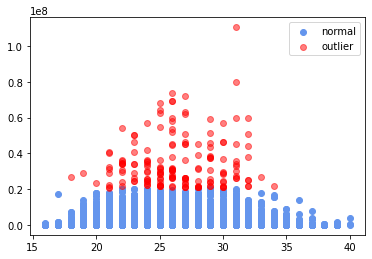

total normal :  8765
total outlier :  167


In [6]:
# outlier의 기준을 value > 20,000,000 으로 지정
out_val = 20000000

# 정상 데이터
temp = train_df.loc[(train_df['value'] <= out_val),:]

# 이상치 데이터
outlier = train_df.loc[(train_df['value'] > out_val),:]

plt.scatter(temp['age'], temp['value'], label='normal', color='cornflowerblue')
plt.scatter(outlier['age'], outlier['value'], label='outlier', color='red', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

print('total normal : ', temp['value'].count())
print('total outlier : ', outlier['value'].count())

In [7]:
outlier.describe()

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02
mean,26.377246,2.676647,84.161677,86.568862,3.197605,3.500000e+07
std,3.240587,0.873088,2.660096,2.869614,1.093461,1.454708e+07
min,18.000000,1.000000,80.000000,82.000000,1.000000,2.050000e+07
25%,24.000000,2.000000,82.000000,84.000000,2.000000,2.450000e+07
50%,26.000000,3.000000,84.000000,86.000000,3.000000,3.050000e+07
75%,29.000000,3.000000,85.500000,89.000000,4.000000,4.075000e+07
max,34.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


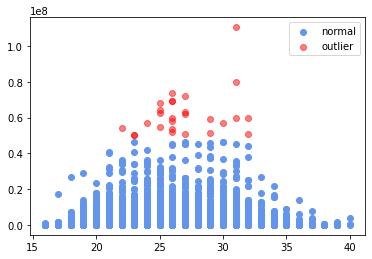

total bnormal :  8905
total outlier :  27


In [8]:
# outlier의 기준을 value > 50,000,000 으로 지정
out_val = 50000000

# 정상 데이터
temp = train_df.loc[(train_df['value'] <= out_val),:]

# 이상치 데이터
outlier_2 = train_df.loc[(train_df['value'] > out_val),:]

plt.scatter(temp['age'], temp['value'], label='normal', color='cornflowerblue')
plt.scatter(outlier_2['age'], outlier_2['value'], label='outlier', color='red', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

print('total bnormal : ', temp['value'].count())
print('total outlier : ', outlier_2['value'].count())

In [9]:
outlier_2.describe()

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01
mean,26.925926,3.407407,88.259259,90.185185,3.074074,6.200000e+07
std,2.800081,0.693889,2.086451,1.710534,1.206582,1.248615e+07
min,22.000000,2.000000,85.000000,87.000000,1.000000,5.050000e+07
25%,25.000000,3.000000,87.000000,89.000000,2.000000,5.375000e+07
50%,26.000000,3.000000,88.000000,90.000000,3.000000,5.950000e+07
75%,29.000000,4.000000,89.000000,91.000000,4.000000,6.600000e+07
max,32.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


> 이적료가 높은 선수는 Age가 22 ~ 32세 임을 활용하여, Age변수를 22 ~ 32, 22 ~ 32가 아닌 나머지로 나누어 범주형 파생변수를 생성한다.

In [10]:
train_df = train_df.drop(index=outlier.index) # outlier 제거

### 전처리

#### 1. Age변수 범주형으로 파생변수 생성

In [11]:
def golden_time(x):
    if x >= 22 and x <= 32:
        return 'o'
    else:
        return 'x'

In [12]:
train_df['golden_age'] = train_df['age'].apply(lambda x : golden_time(x))
test_df['golden_age'] = test_df['age'].apply(lambda x : golden_time(x))

train_df

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,golden_age
id,,,,,,,,,,,
41,40,europe,2019,GK,right,4.0,88,88,1.0,4000000.0,x
75,33,south america,2020,MF,right,3.0,86,86,3.0,18000000.0,x
102,35,south america,2020,DF,right,3.0,85,85,2.0,9000000.0,x
108,35,europe,2019,DF,right,4.0,85,85,2.0,9000000.0,x
109,36,europe,2022,ST,right,5.0,85,85,5.0,14000000.0,x
...,...,...,...,...,...,...,...,...,...,...,...
16925,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0,x
16936,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0,x
16941,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0,x


#### 2. 데이터 형변환 및 오기입 데이터 수정

In [13]:
def con_period(x):
    if x == 'Dec 31, 2018' :
        return '2019'
    elif x == 'Jun 30, 2020' :
        return '2020.5'
    elif x == 'Jun 30, 2019' :
        return '2019.5'
    elif x == 'May 31, 2020' :
        return '2020.3333'
    elif x == 'May 31, 2019' :
        return '2019.3333'
    elif x == 'Jan 31, 2019' :
        return '2019.0833'
    elif x == 'Jan 1, 2019' :
        return '2019'
    elif x == 'Jan 12, 2019' :
        return '2019.034'
    elif x == 'Dec 31, 2019' :
        return '2020'
    elif x == 'Jun 1, 2019' :
        return '2019.416'
    else :
        return x

In [14]:
# 현재 년도를 2018년으로 하고 contract_until 변수를 현재부터 몇년의 계약 기간이 남았는지 확인하는 변수로 사용
train_df['contract'] = 2018
test_df['contract'] = 2018

train_df.contract_until = train_df.contract_until.apply(con_period).astype('float64')
test_df.contract_until = test_df.contract_until.apply(con_period).astype('float64')

train_df.contract_until -= train_df.contract
test_df.contract_until -= test_df.contract 

train_df.drop('contract', axis = 1, inplace = True)
test_df.drop('contract', axis = 1, inplace = True)

In [15]:
# reputation 변수 int형으로 치환
train_df['reputation'] = train_df['reputation'].astype('int')
test_df['reputation'] = test_df['reputation'].astype('int')
# stat_skill_moves 변수 int형으로 치환
train_df['stat_skill_moves'] = train_df['stat_skill_moves'].astype('int')
test_df['stat_skill_moves'] = test_df['stat_skill_moves'].astype('int')

### 왜도가 높은 변수 로그 변환

In [16]:
train_df[['age','reputation', 'stat_potential']] = np.log1p(train_df[['age','reputation', 'stat_potential']])
test_df[['age','reputation', 'stat_potential']] = np.log1p(test_df[['age','reputation', 'stat_potential']])

# target 값을 로그화 하였으므로 나중에 predict 돼 도출된 값을 지수화 해야함
train_df.value = np.log1p(train_df.value)

### 변수 다중공선성 제거

<AxesSubplot:>

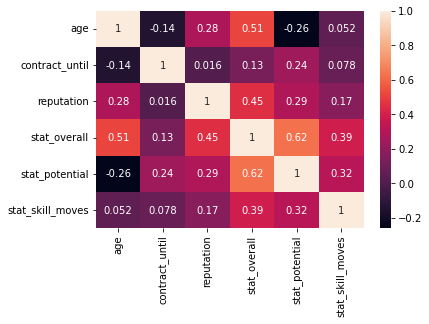

In [17]:
x = train_df.drop(['value'], axis=1)
y = train_df['value']

sns.heatmap(x.corr(), annot=True)

In [18]:
# VIF(Variance inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_num = x[['age', 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves']]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(x_num.values, i) for i in range(x_num.shape[1])]
vif["features"] = x_num.columns
vif

,VIF,features
0,327.231599,age
1,40.151289,reputation
2,209.867415,stat_overall
3,294.042643,stat_potential
4,13.186897,stat_skill_moves


- VIF 즉, 의존성이 높은 변수인 stat_overall 변수를 제외

In [19]:
train_df = train_df.drop('stat_overall', axis=1)
test_df = test_df.drop('stat_overall', axis=1)

#### 3. 범주형 변수 onehot encoding

In [20]:
for i in ['continent', 'position', 'prefer_foot', 'golden_age']:
    train_df = pd.get_dummies(train_df, columns = [i])
    test_df = pd.get_dummies(test_df, columns = [i])

### train validation 분할

In [21]:
from sklearn.model_selection import train_test_split

x = train_df.drop(['value'], axis=1)
y = train_df['value']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=17)

### 표준화

In [22]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
st.fit(x_train)

# sscaled_train = pd.DataFrame(st.transform(x_train), columns=train_df.drop(['value'],axis=1).columns)
# sscaled_val = pd.DataFrame(st.transform(x_valid), columns=train_df.drop(['value'],axis=1).columns)
# sscaled_test = pd.DataFrame(st.transform(test_df), columns=test_df.columns)

scaled_train = pd.DataFrame(st.transform(x_train), columns=train_df.drop(['value'],axis=1).columns)
scaled_val = pd.DataFrame(st.transform(x_valid), columns=train_df.drop(['value'],axis=1).columns)
scaled_test = pd.DataFrame(st.transform(test_df), columns=test_df.columns)

### 정규화

In [23]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
mm.fit(x_train)

# sscaled_train = pd.DataFrame(mm.transform(x_train), columns=x_train.columns)
# sscaled_val = pd.DataFrame(mm.transform(x_valid), columns=x_valid.columns)
# sscaled_test = pd.DataFrame(mm.transform(test_df), columns=test_df.columns)

sscaled_train = pd.DataFrame(mm.transform(scaled_train), columns=scaled_train.columns)
sscaled_val = pd.DataFrame(mm.transform(scaled_val), columns=scaled_val.columns)
sscaled_test = pd.DataFrame(mm.transform(scaled_test), columns=scaled_test.columns)

In [24]:
x_train, x_valid, x_test = sscaled_train, sscaled_val, sscaled_test

### 모델링 (NGBRegressor)

In [25]:
from ngboost import NGBRegressor
from sklearn.model_selection import cross_val_score, KFold

ngb = NGBRegressor(random_state = 2022)

cv_ngb = cross_val_score(ngb, x, y, cv = KFold(n_splits = 5, random_state = 2022, shuffle = True), scoring = 'neg_mean_squared_error')
cv_ngb.mean()

[iter 0] loss=1.7029 val_loss=0.0000 scale=1.0000 norm=1.2354
[iter 100] loss=1.1068 val_loss=0.0000 scale=2.0000 norm=1.4155
[iter 200] loss=0.4557 val_loss=0.0000 scale=2.0000 norm=1.0268
[iter 300] loss=0.1410 val_loss=0.0000 scale=2.0000 norm=0.9904
[iter 400] loss=0.0167 val_loss=0.0000 scale=2.0000 norm=1.0339
[iter 0] loss=1.7073 val_loss=0.0000 scale=1.0000 norm=1.2396
[iter 100] loss=1.1319 val_loss=0.0000 scale=1.0000 norm=0.7209
[iter 200] loss=0.4729 val_loss=0.0000 scale=2.0000 norm=1.0315
[iter 300] loss=0.1456 val_loss=0.0000 scale=2.0000 norm=0.9898
[iter 400] loss=0.0179 val_loss=0.0000 scale=2.0000 norm=1.0264
[iter 0] loss=1.6984 val_loss=0.0000 scale=1.0000 norm=1.2301
[iter 100] loss=1.1150 val_loss=0.0000 scale=2.0000 norm=1.4284
[iter 200] loss=0.4610 val_loss=0.0000 scale=2.0000 norm=1.0316
[iter 300] loss=0.1436 val_loss=0.0000 scale=2.0000 norm=0.9922
[iter 400] loss=0.0210 val_loss=0.0000 scale=2.0000 norm=1.0322
[iter 0] loss=1.6994 val_loss=0.0000 scale=1.0

-0.07888090655000742

In [26]:
ngb.fit(x_train, y_train)

ngb_train_pred = np.expm1(ngb.predict(x_train))
ngb_valid_pred = np.expm1(ngb.predict(x_valid))
ngb_test_pred = np.expm1(ngb.predict(x_test))

[iter 0] loss=1.7055 val_loss=0.0000 scale=1.0000 norm=1.2381
[iter 100] loss=1.1251 val_loss=0.0000 scale=1.0000 norm=0.7184
[iter 200] loss=0.4703 val_loss=0.0000 scale=2.0000 norm=1.0324
[iter 300] loss=0.1459 val_loss=0.0000 scale=2.0000 norm=0.9898
[iter 400] loss=0.0242 val_loss=0.0000 scale=1.0000 norm=0.5136


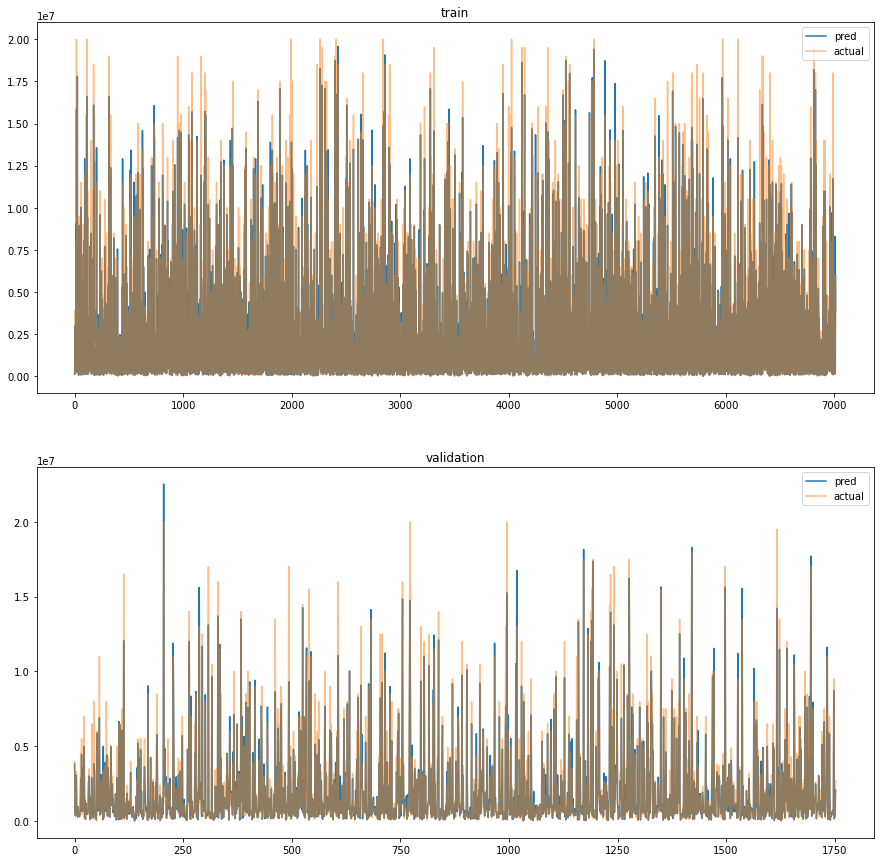

In [27]:
fig, ax = plt.subplots(2,1,figsize=(15,15))

ax1 = plt.subplot(2,1,1)
ax1.plot(ngb_train_pred, label='pred')
ax1.plot(np.expm1(y_train.values), label='actual', alpha=0.5)
ax1.legend(loc='upper right')
ax1.set_title('train')

ax2 = plt.subplot(2,1,2)
ax2.plot(ngb_valid_pred, label='pred')
ax2.plot(np.expm1(y_valid.values), label='actual', alpha=0.5)
ax2.legend(loc='upper right')
ax2.set_title('validation')

plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def rmse(act, pred):
    return mean_squared_error(act, pred)**0.5

print('< train >')
print('RMSE : ', rmse(np.expm1(y_train),ngb_train_pred))
print('MAPE : ', mean_absolute_percentage_error(np.expm1(y_train), ngb_train_pred))

print('< validation >')
print('RMSE : ', rmse(np.expm1(y_valid),ngb_valid_pred))
print('MAPE : ', mean_absolute_percentage_error(np.expm1(y_valid), ngb_valid_pred))

< train >
RMSE :  869590.9378199464
MAPE :  0.21187668220765418
< validation >
RMSE :  848098.1088108916
MAPE :  0.2145368966708409


### 모델링 (LGBM)

In [29]:
from lightgbm import LGBMRegressor



#모델 정의
lgb = LGBMRegressor()
# 모델 학습
lgb.fit(x_train, y_train)

# train, valid 데이터 예측
train_pred = np.expm1(lgb.predict(x_train))
valid_pred = np.expm1(lgb.predict(x_valid))
test_pred = np.expm1(lgb.predict(x_test))

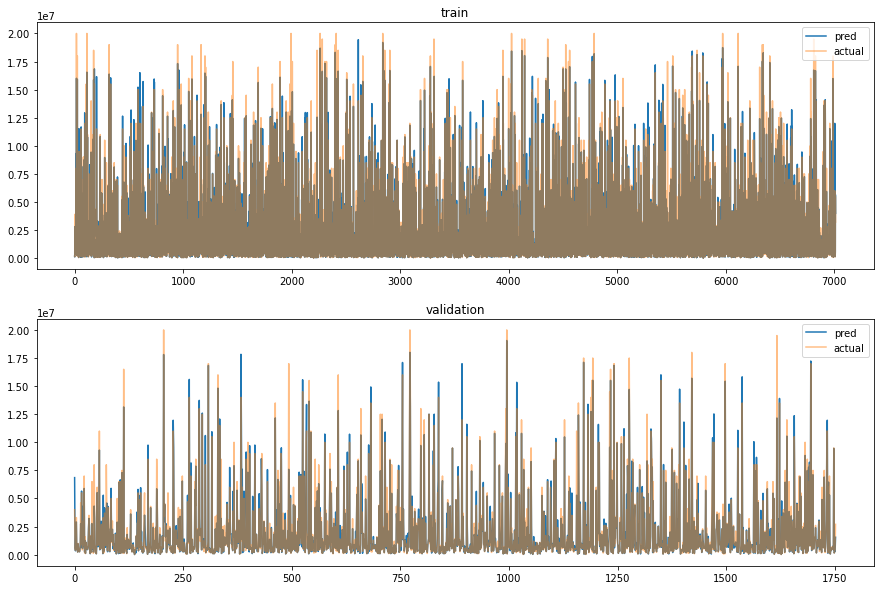

In [30]:
fig, ax = plt.subplots(2,1,figsize=(15,10))

ax1 = plt.subplot(2,1,1)
ax1.plot(train_pred, label='pred')
ax1.plot(np.expm1(y_train.values), label='actual', alpha=0.5)
ax1.legend(loc='upper right')
ax1.set_title('train')

ax2 = plt.subplot(2,1,2)
ax2.plot(valid_pred, label='pred')
ax2.plot(np.expm1(y_valid.values), label='actual', alpha=0.5)
ax2.legend(loc='upper right')
ax2.set_title('validation')

plt.show()

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def rmse(act, pred):
    return mean_squared_error(act, pred)**0.5

print('< train >')
print('RMSE : ', rmse(np.expm1(y_train),train_pred))
print('MAPE : ', mean_absolute_percentage_error(np.expm1(y_train), train_pred))

print('< validation >')
print('RMSE : ', rmse(np.expm1(y_valid),valid_pred))
print('MAPE : ', mean_absolute_percentage_error(np.expm1(y_valid), valid_pred))

< train >
RMSE :  720493.0028575114
MAPE :  0.17134829814004623
< validation >
RMSE :  779011.601906398
MAPE :  0.19124996754532314


### 모델링 (CatBoost)

In [32]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
import random

In [33]:
param = {'depth' : [2,3,4,5,6,7,8,9,10],
         'learning_rate' : [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.25]}

grid_cat = GridSearchCV(CatBoostRegressor(random_state = 2022), 
                        param, 
                        cv = KFold(n_splits = 5, shuffle = True, random_state = 2022), 
                        scoring = 'neg_mean_squared_error', 
                        n_jobs = -1,
                        verbose = 1)

In [34]:
grid_cat.fit(x_train, y_train)

UnicodeEncodeError: 'ascii' codec can't encode characters in position 18-20: ordinal not in range(128)

In [ ]:
cat = CatBoostRegressor(random_state = 2022, **grid_cat.best_params_)
cat.fit(x_train, y_train)

In [ ]:
cat_train_pred = np.expm1(cat.predict(x_train))
cat_valid_pred = np.expm1(cat.predict(x_valid))
cat_test_pred = np.expm1(cat.predict(x_test))

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(15,10))

ax1 = plt.subplot(2,1,1)
ax1.plot(cat_train_pred, label='pred')
ax1.plot(y_train.values, label='actual', alpha=0.5)
ax1.legend(loc='upper right')
ax1.set_title('train')

ax2 = plt.subplot(2,1,2)
ax2.plot(cat_valid_pred, label='pred')
ax2.plot(y_valid.values, label='actual', alpha=0.5)
ax2.legend(loc='upper right')
ax2.set_title('validation')

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def rmse(act, pred):
    return mean_squared_error(act, pred)**0.5

print('< train >')
print('RMSE : ', rmse(y_train, cat_train_pred))
print('MAPE : ', mean_absolute_percentage_error(y_train, cat_train_pred))

print('< validation >')
print('RMSE : ', rmse(y_valid, cat_valid_pred))
print('MAPE : ', mean_absolute_percentage_error(y_valid, cat_valid_pred))

### submission 파일 생성

In [ ]:
submission  = pd.read_csv('../../../이적료_예측/submission.csv')
submission['value'] = test_pred

In [ ]:
submission.head()

In [ ]:
submission.to_csv('../../../이적료_예측/0601_2.csv',index = False)